# Dimensionality Reduction 

## What is Dimensionality Reduction ?

** To understand Dimensionality Reduction, First we should understand Curse Of Dimensionality. **

#### Wikipedia - Curse Of Dimensionality

** It refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. **

#### Dimensionality Reduction

** In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. **

## How to overcome Curse of Dimensionality ?

To overcome the above problem, we do dimensionality reduction. There are number of ways of Dimensionality reduction such as feature selection and Feature Extraction.

   * PCA
   * Missing Value Ratio
   * Low Variance Filter
   * Backward Feature Elimination
   * Forward Feature Construction
   * High Correlation Filter
   

### * PCA

   ** Principal Components Analysis means components which are able to explain the maximum amount of variance of the features with respect to target variable, if we include all feature as components then we get the variance of 1. **


   ** PCA transforms all the interrelated variable into uncorrelated variable.Each uncorrelated variable is a Principal Component and each components is a linear combination of original variable. ** 
   
   ** Each uncorrelated variable or components holds feature information which is explained as variance.Each component with its variance add upto 1. **

   ** Since each principal component is combination of original variable, some principal components explains more variance than others. **
   
   ** The variance explained by one principal component is uncorrelated with other principal components which means with each component we are learning or explaining a new feature. **
   
   ** Now raises a question, how many components will be able to explain the maximum variance?. We don't have any text book method for calculating the number of components for a given number of feature or variables.But We can maintain a variance threshold which needs to explained by the variance of the components. **
   
   ** Consider we have set a threshold variance of 0.8, and if have ten components with a variance as follows 0.3, 0.25, 0.15, 0.1, 0.08, 0.08, 0.07, 0.07. then we can notice 0.3 is a component with maximum variance and is called as *First Principal Component*. Now since the threshold is kept at 0.8, we can add up components untill it reaches a variance of 0.8. **
   
   ** By adding first 3 components, we have variance explained at 0.7 and by including 4th component we reach a variance of 0.8.So we can including 4 components instead of ten components thus reducing the dimension from 10 to 4. **
   
   **                                                                                                                         **

### * Missing Value Ratio

** In a Dataset, We have various columns and each column contains values but if data columns contains missing values then we have think about the feature selection based on Missing value ratio i.e. we can set a threshold for number of Missing value a column may contain and if we have ratio of Missing value greater than the threshold then we can drop the feature. **

** Higher the threshold, more aggressive the drop in features. **

**                                                                                                                          **

### * Low Variance Filter

** It is similar to PCA Conceptually i.e. if a column carries very little information or has variance lower than a threshold value then we can drop feature i.e. variance value acts as Filter for Feature Selection. **

** Variance is range dependent, so normalization is required before applying this technique ** 

**                                                                                                                          **

### * Backward Feature Elimination

** In Simple terms, If a model is trained on n-input feature and error rate is calculated, then again if model is trained on n-1 feature and error rate is calculated, now if error rate is increased by small value then the feature is dropped from the dataset. **

** Backward feature Elimination can be performed iteratively to get better feature. **

**                                                                                                                          **

### * Forward Feature Construction

** In this Feature Selection process, we train a model with one feature and calculate the performance measure. We keeping adding feature, one by one and calculate the performance if the performance decreases with increase in Feature, we should drop the feature and if the performance increases with increase in Feature, We iteratively add feature to the model. **

**                                                                                                                          **

### * High Correlation Filter

** Here, If the columns present in the dataset are high correlated then the information becomes redundant and we drop those high redundant variables from features.**

** We can calculate the correlation coefficient between Numerical columns / variables. **
** We can calculate the correlation coefficient between Nominal columns / variables. **
** We can use the pearson product moment coefficient between Numerical columns / variables. **
** We can use the pearson Chi squared value between Nominal columns / variables. **

** Before doing correlation operation, Perform normalization on the columns as correlation is scale sensitive. **

**                                                                                                                          **

### Note : 
** Both Forward Feature Construction and Backward Feature Elimination are computionally expensive tasks. **


## Understanding Principal Component Analysis

** Here we'll try to understand PCA by working on Digit Dataset.Since images have higher dimension, we'll be loading a built in dataset from sklearn.datasets.We make all the import statements respective from loading the dataset to measuring the metrics.**

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import skimage as img
import seaborn as sns

In [11]:
load_digits = load_digits()

We are loading the digits dataset for our problem. We can notice that we have around 64 feature representing the digit.

In [12]:
load_digits.data.shape

(1797, 64)

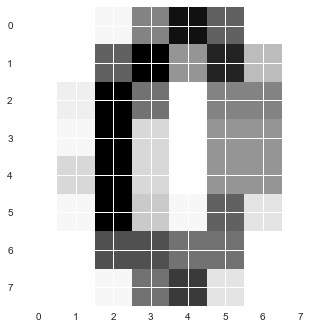

In [13]:
plt.imshow(np.array(load_digits.data[10]).reshape(8,8))
plt.show()

Below, we have ***.data*** which represents the feature/independent variable and ***.target*** which represents dependent variable.

In [5]:
X = load_digits.data
y = load_digits.target

** Variance of an feature with respect to target variable, explains a lot about the relationship between feature and target variable. **

** We have a list of components included in our list over which we try to explain the variance. As the components are increasing the variance also increases. **

** First, we are iterating over a number of components to find the best match between variance and component. And as we notice the number of components are increased, the explained variance is also increasing but after a certain value the increase components doesn't increase the explained variance which causes saturates the explained variance. **

** From the results, we can notice how the variance value increases to 1 when the number of feature included are all the 63 components **

In [18]:
variance = []
components = [4,8,12,16,20,24,28,32,63]
for x in list([4,8,12,16,20,24,28,32,63]):
    dimReduction = PCA(n_components=x)
    X_DR_PCA = dimReduction.fit_transform(X)
    print("Explained Variance with", x ," Components: " ,dimReduction.explained_variance_ratio_.sum())
    variance.append(dimReduction.explained_variance_ratio_.sum())
    X_train,X_test,y_train,y_test = train_test_split(X_DR_PCA,y,test_size=0.25)
    RFC_2 = RandomForestClassifier()
    RFC_2.fit(X_train,y_train)
    mnb.fit(X_train,y_train)
    y_pred = RFC_2.predict(X_test)
    y_prediction = mnb.predict(X_test)
    print("Accuracy Score with Random Forest Classifier",m.accuracy_score(y_test,y_pred))
    print("Accuracy Score with Gaussian NB",m.accuracy_score(y_test,y_prediction))
    print("--------------------------------------------------")

Explained Variance with 4  Components:  0.487139380087
Accuracy Score with Random Forest Classifier 0.844444444444
Accuracy Score with Gaussian NB 0.806666666667
--------------------------------------------------
Explained Variance with 8  Components:  0.673905828999
Accuracy Score with Random Forest Classifier 0.888888888889
Accuracy Score with Gaussian NB 0.866666666667
--------------------------------------------------
Explained Variance with 12  Components:  0.784674793852
Accuracy Score with Random Forest Classifier 0.935555555556
Accuracy Score with Gaussian NB 0.928888888889
--------------------------------------------------
Explained Variance with 16  Components:  0.849396843205
Accuracy Score with Random Forest Classifier 0.942222222222
Accuracy Score with Gaussian NB 0.928888888889
--------------------------------------------------
Explained Variance with 20  Components:  0.894294359648
Accuracy Score with Random Forest Classifier 0.926666666667
Accuracy Score with Gaussian N

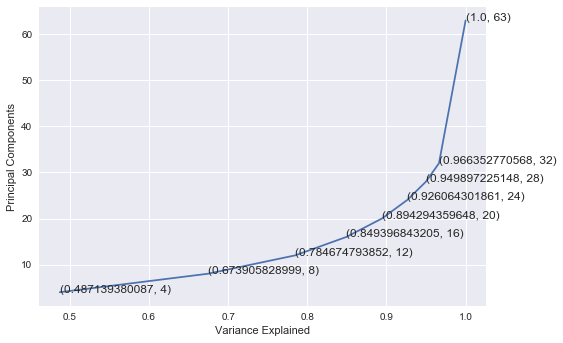

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(variance,components)
for xy in zip(variance, components):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Variance Explained")
plt.ylabel("Principal Components")
plt.show()

**From 64 Feature vector to 24 Feature, to get the same result. We can see from the changes in variance with respect to the components, the changes saturate after n_components is 24 which can be seen from the result mentioned below.Thus we can assign the n_components as 24 i.e. we can explain maximum variance of 0.92 with 24 principal components at the accuracy of 93%. **

In [29]:
pca_1_Comp = PCA(n_components=24)
X_1 = pca_1_Comp.fit_transform(X)
print("Explained Variance: ",pca_1_Comp.explained_variance_ratio_.sum())
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_1,y,test_size = 0.2,random_state=1)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
print("Accuracy: ",m.accuracy_score(y_test,y_predict))

Explained Variance:  0.926065743215
Accuracy:  0.936111111111
